In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Data:

In [87]:
raw_data = pd.read_csv('data/train.csv')
raw_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# PreProcessing: 
- drop unnamed column
- drop id column
- drop rows that have Nan 

In [88]:
data = raw_data.drop(['id', 'Unnamed: 0'], axis=1)
data = data.dropna(axis=0)

In [89]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Change categorical data to numeric(using one hot encoding): 

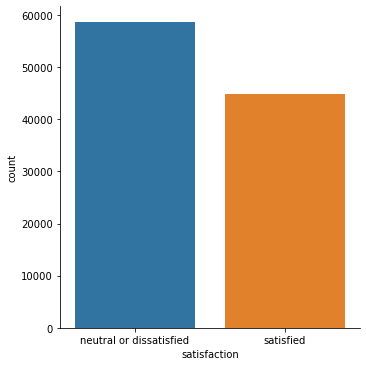

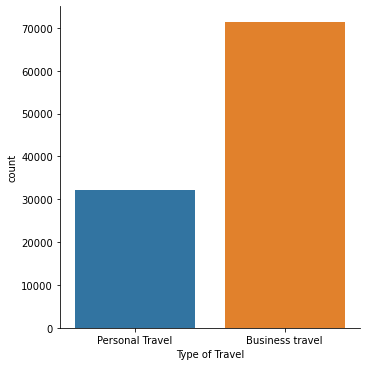

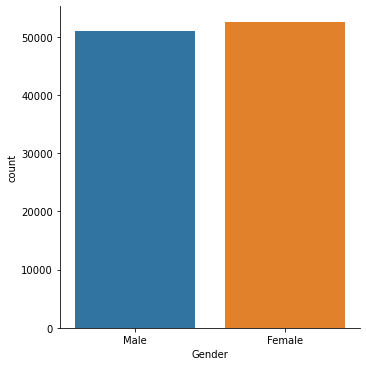

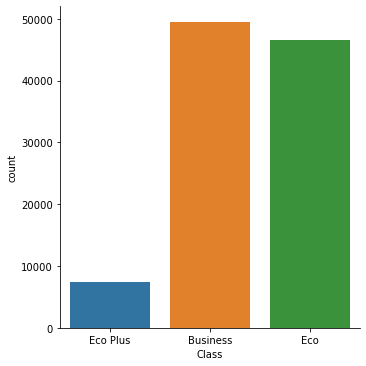

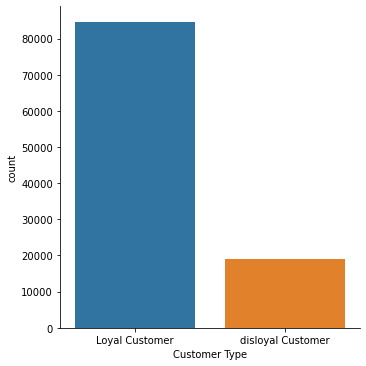

In [90]:
cat_cols = list(set(data.columns) - set(data._get_numeric_data().columns))
for s in cat_cols:
    sns.catplot(x=s, kind="count", data=data)

In [91]:
encd_data = pd.get_dummies(data, columns = list(set(cat_cols)-set(['satisfaction'])))
encd_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)

print(encd_data.columns)

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer'],
      dtype='object')


In [92]:
encd_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,...,0.433394,0.507520,0.492480,0.689857,0.310143,0.478145,0.449765,0.072089,0.817248,0.182752
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,...,0.495546,0.499946,0.499946,0.462554,0.462554,0.499525,0.497472,0.258637,0.386465,0.386465
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalize, using min max scaling: 

In [93]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())  

for col in encd_data.drop(['satisfaction'], axis=1).columns:
    encd_data[col] = min_max_scaling(encd_data[col])
    
encd_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.415134,0.233911,0.545951,0.612016,0.551397,0.595405,0.640425,0.650099,0.687953,0.671668,...,0.433394,0.507520,0.492480,0.689857,0.310143,0.478145,0.449765,0.072089,0.817248,0.182752
std,0.193758,0.201393,0.265573,0.305047,0.279787,0.255545,0.265880,0.269887,0.263779,0.266606,...,0.495546,0.499946,0.499946,0.462554,0.462554,0.499525,0.497472,0.258637,0.386465,0.386465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.423077,0.163772,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.564103,0.345719,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# a function to do preprocessing
def preprocess(df):
    df = df.drop(['id', 'Unnamed: 0'], axis=1)
    df = df.dropna(axis=0)
    cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
    encd_data = pd.get_dummies(df, columns = list(set(cat_cols)-set(['satisfaction'])))
    encd_data['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'],
                            [0, 1], inplace=True)
    
    for col in encd_data.drop(['satisfaction'], axis=1).columns:
        encd_data[col] = min_max_scaling(encd_data[col])
    
    return encd_data

# Perceptron

In [95]:
from sklearn.linear_model import Perceptron

In [96]:
X = encd_data.drop('satisfaction', axis=1)
y = encd_data['satisfaction']

perceptron = Perceptron(eta0=0.4, tol=None, max_iter= 1500)
# eta0 -> learing rate
# tol  -> The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
# max_iterint -> The maximum number of passes over the training data (aka epochs)
perceptron.fit(X, y)

Perceptron(eta0=0.4, max_iter=1500, tol=None)

In [97]:
training_data_accuracy = perceptron.score(X, y)
training_data_accuracy
# Returns the mean accuracy on the given test data and labels.

0.8305886441299689

### Test data:

In [98]:
test_data = pd.read_csv('data/test.csv')

encd_test_data = preprocess(test_data)

X_test = encd_test_data.drop('satisfaction', axis=1)
y_test = encd_test_data['satisfaction']

testing_data_accuracy = perceptron.score(X_test, y_test)
testing_data_accuracy

0.8335843664310818

# Kernel trick using feature maps:

## RBF feature mapping:

- [Feature mapping explained](https://xavierbourretsicotte.github.io/Kernel_feature_map.html#Gram-Matrix-vs-Feature-Map)
- [rbf feature mapping](https://scikit-learn.org/stable/modules/kernel_approximation.html#rbf-kernel-approx)
- [rbf sampler](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html#sklearn.kernel_approximation.RBFSampler)
- [Kernel perceptron](https://en.wikipedia.org/wiki/Kernel_perceptron)


In [99]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(n_components=3200, gamma=1/40, random_state=1)
X_rbf_mapping = rbf_feature.fit_transform(X)

In [100]:
X_rbf_mapping.shape

(103594, 3200)

In [101]:
clf = Perceptron(eta0=0.1, tol=1e-3)
clf.fit(X_rbf_mapping, y)
clf.score(X_rbf_mapping, y)

0.9166457516844605

In [102]:
test_data = pd.read_csv('data/test.csv')

encd_test_data = preprocess(test_data)

X_test = encd_test_data.drop('satisfaction', axis=1)
y_test = encd_test_data['satisfaction']

X_test_rbf = rbf_feature.transform(X_test)
clf.score(X_test_rbf, y_test)

0.9197852701502337